# Appendix of Models
    This is a collection of models that were created throughout the process of our project. Rather than simply throwing away our work, we wanted to preserve the different stages of code and thoughts we were processing through. The previous iterations of our project all had influence on our final project and we hope that this provides inspiration or a resource for future work. 

## Table of Contents

1. [Current Models](#current)
2. [Previous Models](#prev)
    - [Baseline Models KNN and Naive Bayes](#baseline)
        - [KNN](#knn)
        - [Naive Bayes](#nb)
    - [Accuracy of Models w/o Feature Selection](#wofs)
        - [Results: KNN](#resknn)
        - [Results: Naive Bayes](#resnb)
    - [Accuracy of Models with Feature Selection](#wfs)
    - [Analysis of Alternative Models: SVM | Decision Trees | NN](#altmodels)
    - [Decision Trees](#dt)
    - [Multi-layer Perceptron NN](#nn)


<a id="current"></a>

<hr style="border:2px solid gray">

# __Current Models__

<hr style="border:2px solid gray">

In [19]:
# Define a list of models or algorithms to compare
models = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Perceptron', MLPClassifier(hidden_layer_sizes=(4, ))),
]

# Define a dictionary of hyperparameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [70, 100, 150],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [1, 3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Perceptron': {
        'alpha': [0.0001, 0.001, 0.01],
        'activation': ['logistic', 'relu']
    },
}

accuracies = pd.DataFrame({})

In [20]:
def loopModel(model, grid, xx, yy): #model is the model, grid is the grid for that model
    NUM_TRIALS=3
    nested_scores = []
    fittedModels =[]
    av_accuracy =[]
    for i in range(NUM_TRIALS):
        inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)
        
        clf = GridSearchCV(estimator=model, param_grid=grid, cv=inner_cv)
        clf.fit(xx, yy)
        
        nested_score = cross_val_score(clf, X=xx, y=yy, cv=outer_cv)
        for j in nested_score:
            nested_scores.append(j)
        av_accuracy.append(nested_score.mean())
        fittedModels.append(clf)
    return (fittedModels, nested_scores, av_accuracy)  

In [21]:
#RF Nested Cross Validation
rfBest = loopModel(models[0][1], param_grids[models[0][0]], X_train, y_train)
accuracies["Random Forest"] = rfBest[1]
print(accuracies["Random Forest"])
rfBest = rfBest[0][rfBest[2].index(max(rfBest[2]))]

0     0.835404
1     0.854037
2     0.881988
3     0.847352
4     0.859813
5     0.866460
6     0.857143
7     0.850932
8     0.853583
9     0.881620
10    0.850932
11    0.863354
12    0.878882
13    0.866044
14    0.831776
Name: Random Forest, dtype: float64


In [55]:
#KNN Nested Cross Validation
knnBest = loopModel(models[1][1], param_grids[models[1][0]], X_train, y_train)
accuracies["KNN"] = knnBest[1]
print(accuracies["KNN"])
knnBest = knnBest[0][knnBest[2].index(max(knnBest[2]))]

0     0.829193
1     0.860248
2     0.881988
3     0.834891
4     0.850467
5     0.844720
6     0.857143
7     0.863354
8     0.834891
9     0.869159
10    0.863354
11    0.869565
12    0.854037
13    0.847352
14    0.819315
Name: KNN, dtype: float64


In [23]:
#SVM Nested Cross Validation
svmBest = loopModel(models[2][1], param_grids[models[2][0]], X_train, y_train)
accuracies["SVM"] = svmBest[1]
print(accuracies["SVM"])
svmBest = svmBest[0][svmBest[2].index(max(svmBest[2]))]

0     0.798137
1     0.816770
2     0.822981
3     0.800623
4     0.856698
5     0.816770
6     0.804348
7     0.819876
8     0.803738
9     0.828660
10    0.807453
11    0.841615
12    0.826087
13    0.825545
14    0.797508
Name: SVM, dtype: float64


In [24]:
#MLP Nested Cross Validation
mlpBest = loopModel(models[3][1], param_grids[models[3][0]], X_train, y_train)
accuracies["Perceptron"] = mlpBest[1]
print(accuracies["Perceptron"])
mlpBest = mlpBest[0][mlpBest[2].index(max(mlpBest[2]))]

0     0.751553
1     0.748447
2     0.739130
3     0.601246
4     0.707165
5     0.736025
6     0.760870
7     0.757764
8     0.757009
9     0.769470
10    0.711180
11    0.698758
12    0.652174
13    0.775701
14    0.694704
Name: Perceptron, dtype: float64


In [41]:
#Naive Bayes Nested Cross Validation
accuracies["Naive Bayes"] = loopModel(GaussianNB(), {}, X_train, y_train)[1]
nbBest = GaussianNB().fit(X_train, y_train)
accuracies.head(7)

,Random Forest,KNN,SVM,Perceptron,Naive Bayes
0,0.835404,0.829193,0.798137,0.751553,0.763975
1,0.854037,0.860248,0.816770,0.748447,0.767081
2,0.881988,0.881988,0.822981,0.739130,0.773292
3,0.847352,0.834891,0.800623,0.601246,0.744548
4,0.859813,0.850467,0.856698,0.707165,0.785047
5,0.866460,0.844720,0.816770,0.736025,0.748447
6,0.857143,0.857143,0.804348,0.760870,0.739130


<a id="prev"></a>

<hr style="border:2px solid gray">

# __Previous Models__

<hr style="border:2px solid gray">


<a id="baseline"></a>
    
## Baseline Models KNN and Naive Bayes

<a id="knn"></a>

### KNN
##### Finding Best Hyperparameters for KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
# Since the paper already said 5, this isn't needed but it will look nice to see that we did it anyways
# to validate the orginal model

pipe = Pipeline([
    ('classifier', KNeighborsClassifier()),
])

search_space = [
    {'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': [1, 3, 5, 7, 9]
    }, 
]

bestKNN = GridSearchCV(pipe, search_space, cv=5, verbose=1)
bestKNN.fit(X_train, y_train)
print(bestKNN.best_params_, bestKNN.best_score_)

bestKNN = KNeighborsClassifier(bestKNN.best_params_['classifier__n_neighbors'])
bestKNN.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'classifier': KNeighborsClassifier(n_neighbors=7), 'classifier__n_neighbors': 7} 0.8333642924866005


KNeighborsClassifier(n_neighbors=7)

<a id="nb"></a>

### Naive Bayes

In [10]:
naiveBayes = GaussianNB() # since we normalized our variables, we used the Gaussian Naive Bayes
naiveBayes.fit(X_train,y_train)

GaussianNB()

<a id="wofs"></a>

## Accuracy of Models without Feature Selection

In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
def show_Accuracy(model, X_train, y_train, X_test, y_test):
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, yhat_train)

    # calculate the test set error
    acc_test = accuracy_score(y_test, yhat_test) 

    print(f'training set accuracy (n={y_train.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_test.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_test, yhat_test))
    print()

    with sns.axes_style('white'):
        ConfusionMatrixDisplay.from_predictions(y_test, yhat_test)

<a id="resknn"></a>

### Results: KNN

training set accuracy (n=1608): 0.922
test set accuracy (n=792): 0.884

classificiation report on test set performance
              precision    recall  f1-score   support

         1.0       0.93      0.88      0.91       276
         2.0       0.83      0.92      0.87       237
         3.0       0.89      0.85      0.87       279

    accuracy                           0.88       792
   macro avg       0.88      0.89      0.88       792
weighted avg       0.89      0.88      0.88       792




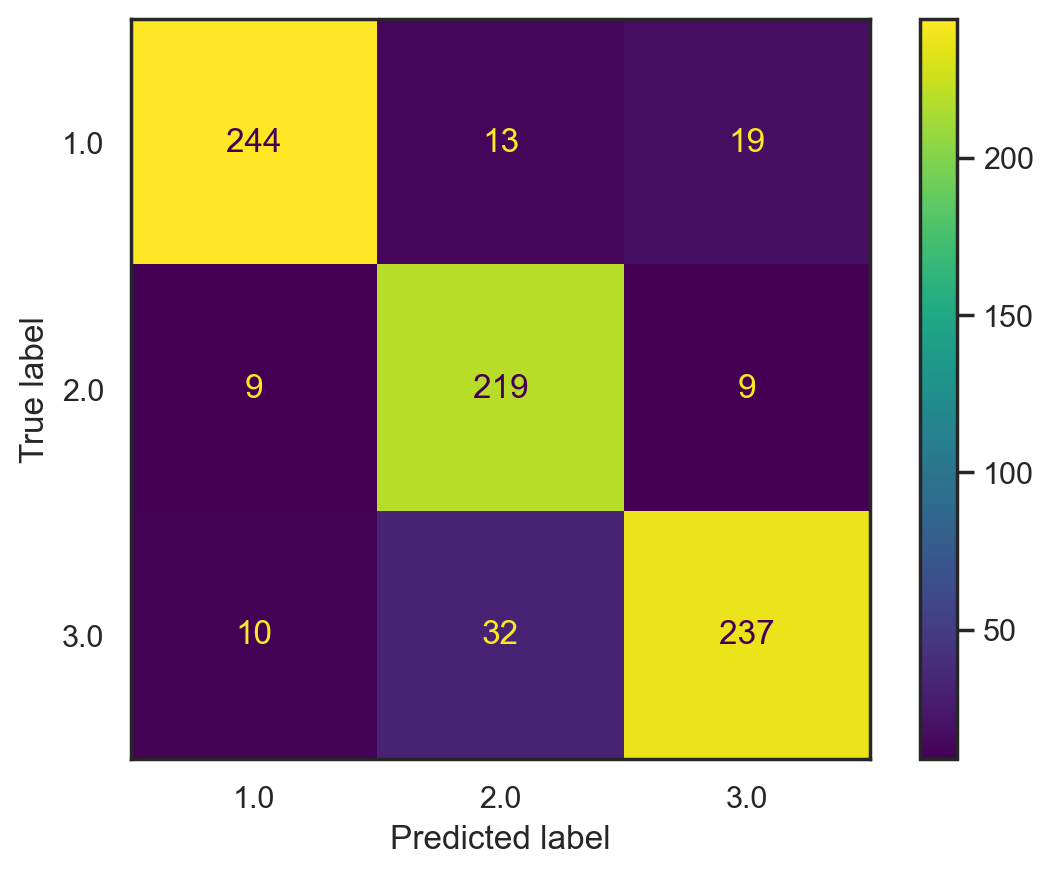

In [36]:
show_Accuracy(bestKNN, X_train, y_train, X_test, y_test)

<a id="resnb"></a>

### Results: Naive Bayes

training set accuracy (n=1608): 0.759
test set accuracy (n=792): 0.770

classificiation report on test set performance
              precision    recall  f1-score   support

         1.0       0.78      0.80      0.79       276
         2.0       0.67      0.96      0.79       237
         3.0       0.94      0.58      0.72       279

    accuracy                           0.77       792
   macro avg       0.80      0.78      0.77       792
weighted avg       0.81      0.77      0.77       792




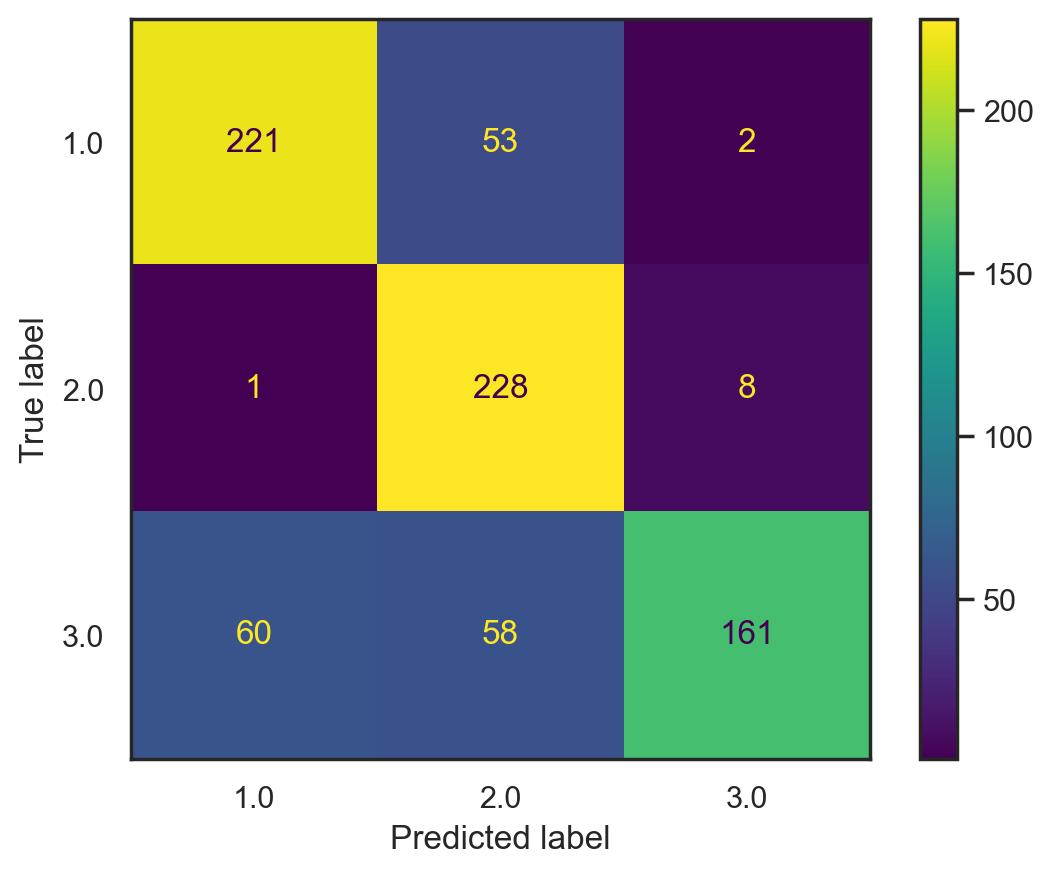

In [15]:
show_Accuracy(naiveBayes, X_train, y_train, X_test, y_test)

The previous section outlined the models that were designed in the original study: naive bayes and KNN. To ensure that the hyperparameter for KNN was the optimal choice, we ran grid search to find the optimal number of nearest neighbors. We also used a Gaussian Naive Bayes model because we normalized our variables in a previous section, which makes this Naive Bayes suitable for our analysis. With these models, we can observe that the KNN is 88.4% accurate on the test data compared to the 77% seen with the Naive Bayes. Overall, KNN is the better of the two models from the study.

<a id="wfs"></a>

<hr style="border:2px solid gray">

## Accuracy of Models with Feature Selection

<div id="Feature-Selection"></div>

### Feature Selection

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Based on the order that the features are appended signify their importance
# e.g. Perimeter is the most important variable and rotation is the least
impOrder = []
for i in range(1,21):
    curr = sfs(KNeighborsClassifier(5), n_features_to_select=i)
    curr.fit(X_train,y_train)
    print(i, ": ", curr.get_feature_names_out())
    impOrder.append(curr.get_feature_names_out())

1 :  ['Perimeter']
2 :  ['MinorAxisLength' 'Perimeter']
3 :  ['MajorAxisLength' 'MinorAxisLength' 'Perimeter']
4 :  ['MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt']
5 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt']
6 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt']
7 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt' 'meanInt']
8 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt' 'meanInt' 'dx']
9 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt' 'meanInt' 'dx' 'dy']
10 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt' 'meanInt' 'dx' 'dy' 'Magnitude']
11 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perimeter' 'IntegratedInt'
 'medianSTDInt' 'meanInt' 'dx' 'dy' 'Magnitude' 'Angle']
12 :  ['Area' 'MajorAxisLength' 'MinorAxisLength' 'Perime

**Features Rated by Importance**

In [17]:
importance = [7, 2, 1, 11, 0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 3, 10, 8, 5, 9, 6, 4]
impOrder # With this array, it's possible to test different subsets of the features

[array(['Perimeter'], dtype=object),
 array(['MinorAxisLength', 'Perimeter'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius'],
       dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius',
        'medianSTDInt'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius',
        'medianSTDInt', 'meanInt'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius',
        'medianSTDInt', 'meanInt', 'dx'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius',
        'medianSTDInt', 'meanInt', 'dx', 'dy'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius',
        'medianSTDInt', 'meanInt', 'dx', 'dy', 'Magnitude'], dtype=object),
 array(['MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius

((0.9521144278606966, 4), (0.9507575757575758, 4))

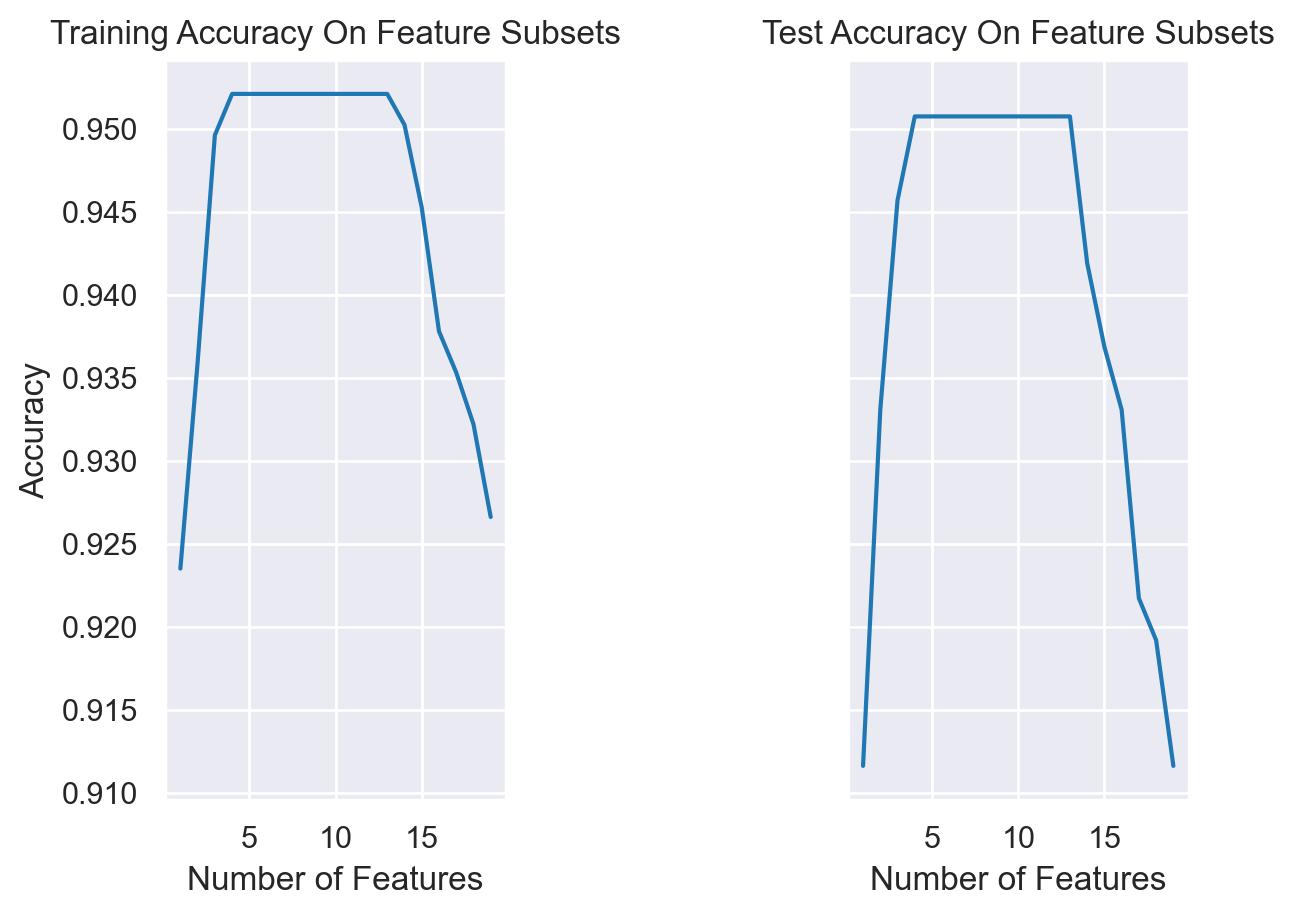

In [82]:
train_acc = []
test_acc = []
best_train_acc = (0, -1)
best_test_acc = (0, -1)
for i in range(1,20):
    X_train_subset = X_train[impOrder[i]]
    X_test_subset = X_test[impOrder[i]]
    
    subset_model = bestKNN.fit(X_train_subset, y_train)

    yhat_train = subset_model.predict(X_train_subset)
    yhat_test = subset_model.predict(X_test_subset)
    
    curr_train_acc = accuracy_score(yhat_train, y_train)
    curr_test_acc = accuracy_score(yhat_test, y_test)
    
    if best_train_acc[0] < curr_train_acc:
        best_train_acc = (curr_train_acc, i)
    if best_test_acc[0] < curr_test_acc:
        best_test_acc = (curr_test_acc, i)
    
    train_acc.append((i, curr_train_acc))
    test_acc.append((i, curr_test_acc))
    
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(left=0.1, right= 0.9, wspace=1)

sns.lineplot(pd.DataFrame(train_acc, columns=['x', 'y']), x='x', y='y', ax=ax1).set(title= "Training Accuracy On Feature Subsets", xlabel="Number of Features", ylabel= "Accuracy")

sns.lineplot(pd.DataFrame(test_acc, columns=['x', 'y']), x='x', y='y', ax=ax2).set(title= "Test Accuracy On Feature Subsets", xlabel="Number of Features", ylabel= "Accuracy")

best_train_acc, best_test_acc

This plot allows us to visualize the accuracy rate of our model based on the current number of features being passed into our model. Since we have the impOrder list, we are able to iterate and test the subsets based on importance and see which features are needed to make an accurate model. As we can see, the KNN model performs best when it is passed the subset with the four most important features: 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'MedianRadius'. 

The reason why we see this dip in training accuracy is a result of the curse of dimensionality. Since we are using are using a 5 nearest neighbors algorithm, the distance between the points have a growth rate of $(\frac{5}{n})^{\frac{1}{D}}$ where n is the number of data points and D is the number of dimensions. As we increase the amount of features to consider in our model, we see a slight decrease in accuracy due to the increase in dimensionality.

<hr style="border:2px solid gray">

<a id="altmodels"></a>

## Analysis of Alternative Models: SVM | Decision Trees | NN

<div id="Various-SVM"></div>

### Various SVM

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to train an SVM and print its accuracy and confusion matrix
def train_and_evaluate_svm(kernel, degree=None):
    # Create an instance of the SVC class with the specified kernel
    if degree:
        svm = SVC(kernel=kernel, degree=degree)
    else:
        svm = SVC(kernel=kernel)
        
    # Fit the model to the training data
    svm.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Display the accuracy
    print(f'SVM with {kernel} kernel accuracy: {accuracy}')

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report for additional statistics
    print(classification_report(y_test, y_pred))


<div id="Accuracy-of-Linear,-Polynomial,-RBF-and-Sigmoid-SVM-without-Feature-Selection"></div>

### Accuracy of Linear, Polynomial, RBF and Sigmoid SVM without Feature Selection

SVM with linear kernel accuracy: 0.922979797979798


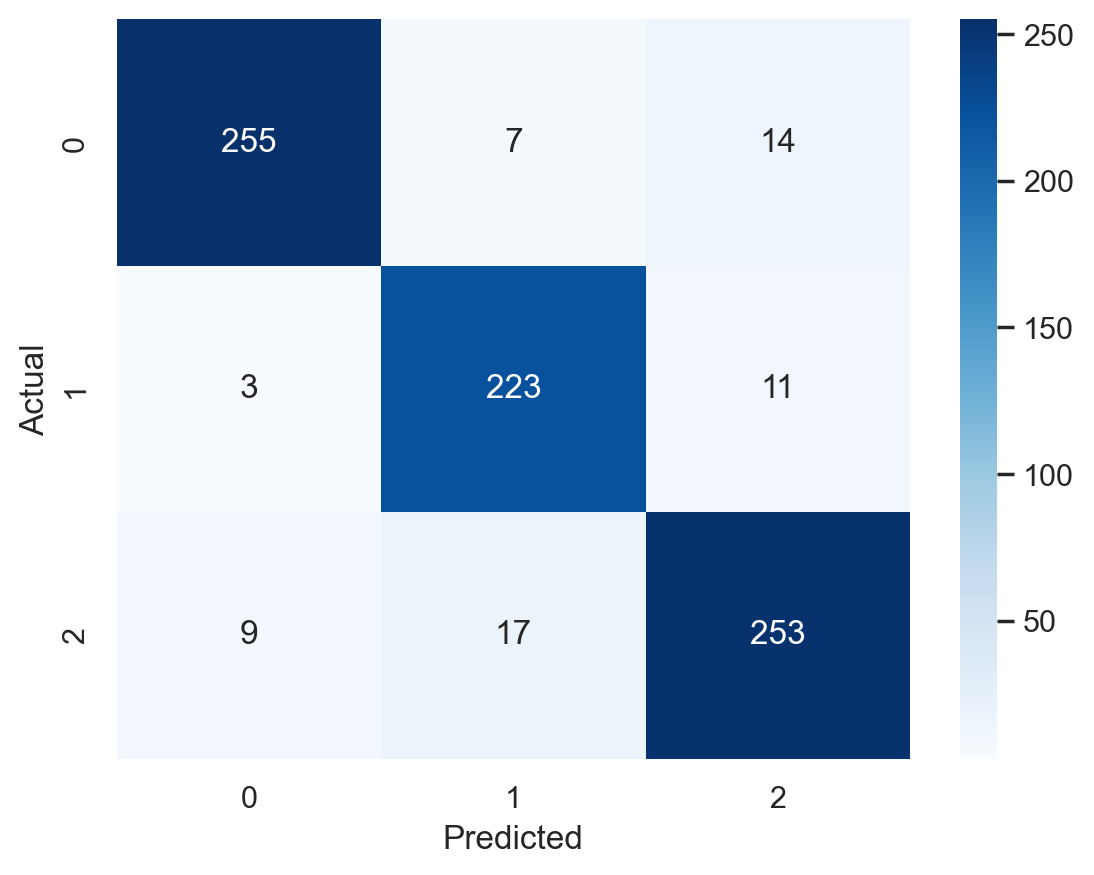

              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       276
         2.0       0.90      0.94      0.92       237
         3.0       0.91      0.91      0.91       279

    accuracy                           0.92       792
   macro avg       0.92      0.92      0.92       792
weighted avg       0.92      0.92      0.92       792

SVM with poly kernel accuracy: 0.8573232323232324


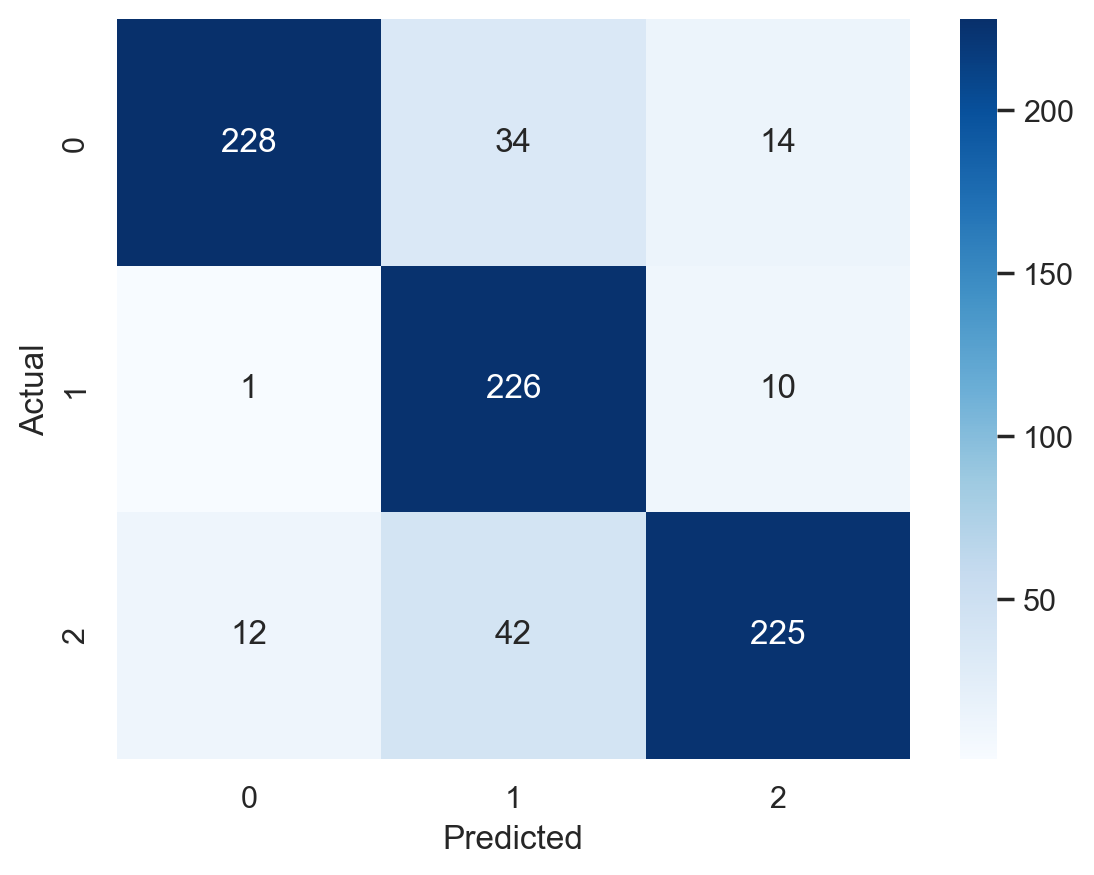

              precision    recall  f1-score   support

         1.0       0.95      0.83      0.88       276
         2.0       0.75      0.95      0.84       237
         3.0       0.90      0.81      0.85       279

    accuracy                           0.86       792
   macro avg       0.87      0.86      0.86       792
weighted avg       0.87      0.86      0.86       792

SVM with rbf kernel accuracy: 0.9217171717171717


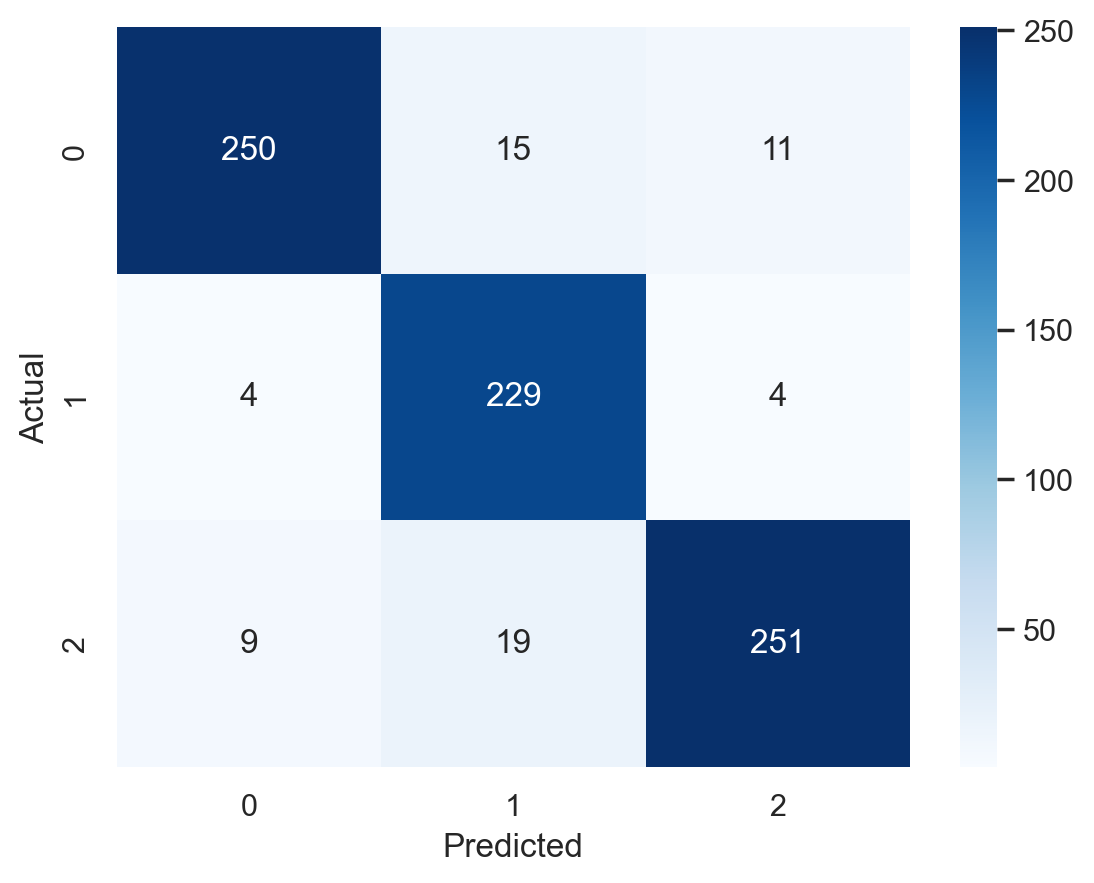

              precision    recall  f1-score   support

         1.0       0.95      0.91      0.93       276
         2.0       0.87      0.97      0.92       237
         3.0       0.94      0.90      0.92       279

    accuracy                           0.92       792
   macro avg       0.92      0.92      0.92       792
weighted avg       0.92      0.92      0.92       792

SVM with sigmoid kernel accuracy: 0.7676767676767676


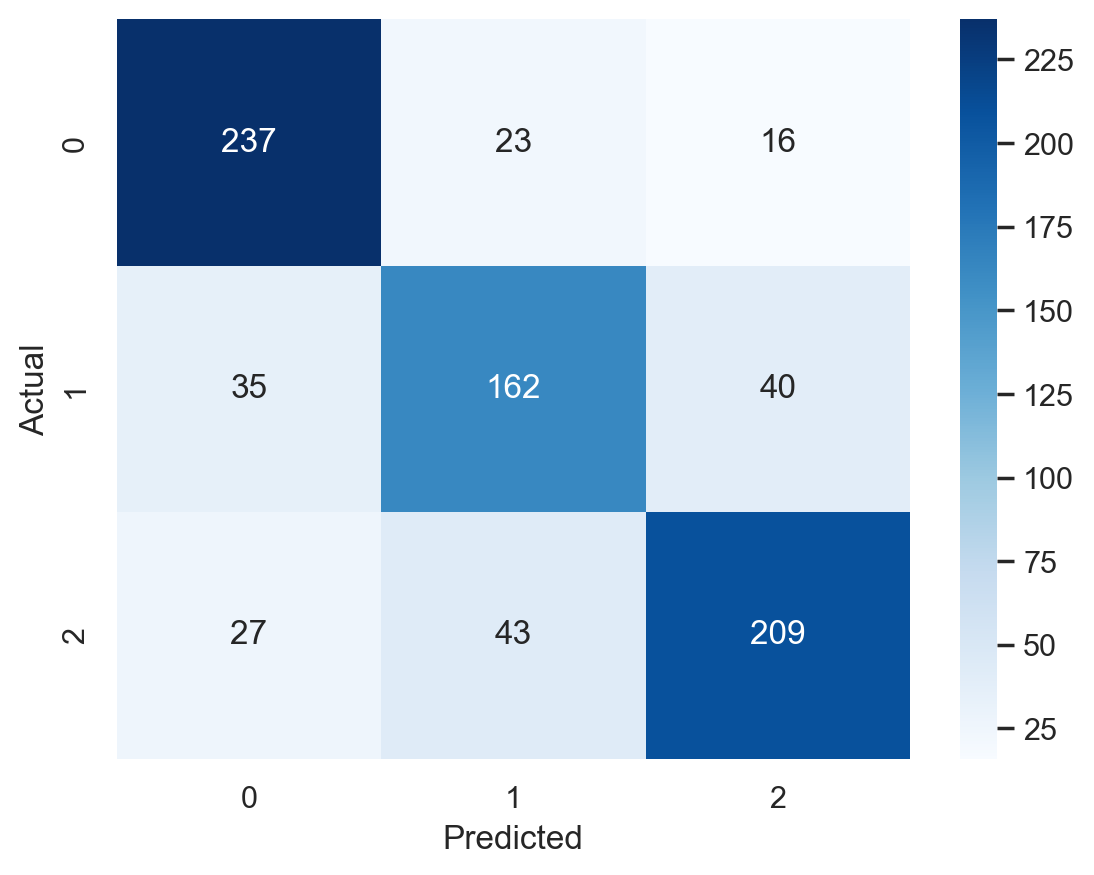

              precision    recall  f1-score   support

         1.0       0.79      0.86      0.82       276
         2.0       0.71      0.68      0.70       237
         3.0       0.79      0.75      0.77       279

    accuracy                           0.77       792
   macro avg       0.76      0.76      0.76       792
weighted avg       0.77      0.77      0.77       792



In [19]:
# Call the function for different types of SVM
train_and_evaluate_svm('linear')
train_and_evaluate_svm('poly', degree=3)
train_and_evaluate_svm('rbf')
train_and_evaluate_svm('sigmoid')

**Summary:** We find out that so far from all the models, linear SVM has done the best! Linear SVM gets an accuracy of 92.297%

<a id="dt"></a>

## Decision Trees

Decision Tree accuracy: 0.9457070707070707


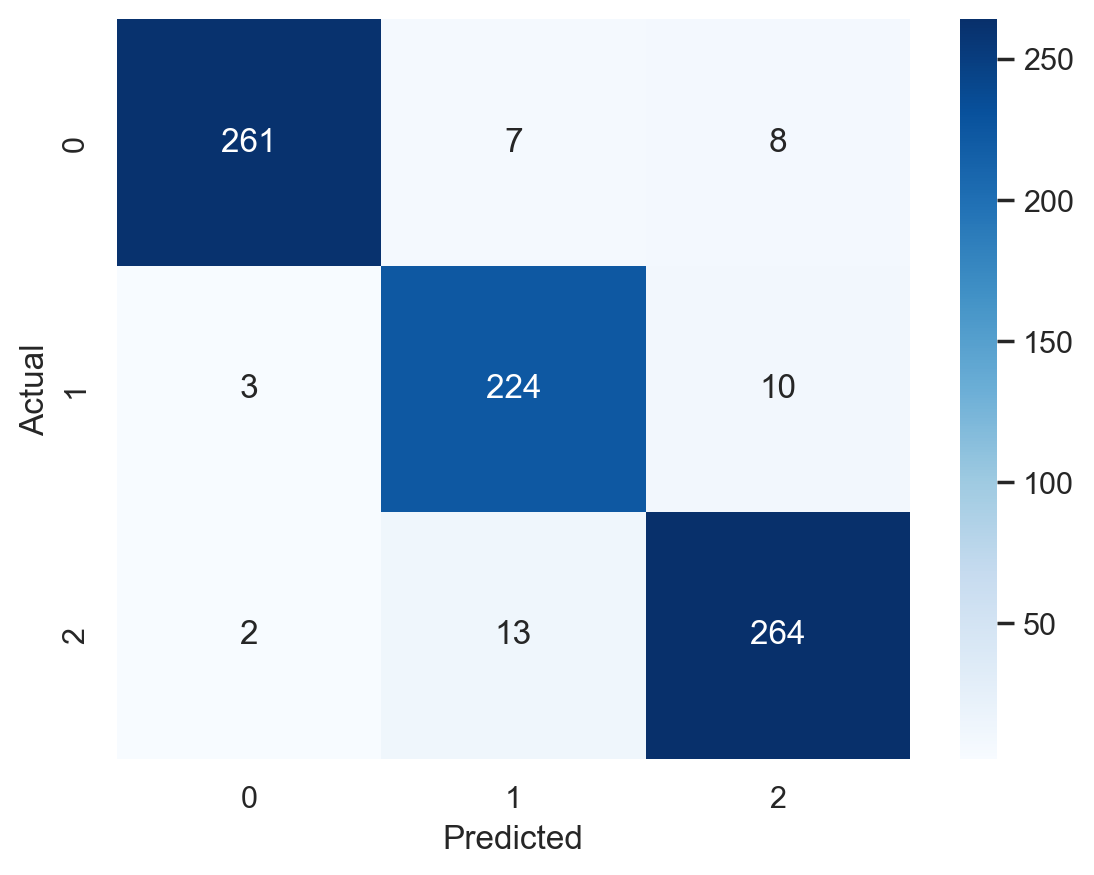

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       276
         2.0       0.92      0.95      0.93       237
         3.0       0.94      0.95      0.94       279

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the model
tree_clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_tree = tree_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Print the accuracy
print(f'Decision Tree accuracy: {accuracy_tree}')

# Create and display the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred_tree))

**Summary:** Decision Trees get a higher accuracy that Linear SVM! DT gives an accuracy of 94.570%

<a id="nn"></a>

## Multi-layer Perceptron NN

In [54]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,learning_rate_init=2e-3, hidden_layer_sizes=(6,12,10,12,15), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 12, 10, 12, 15), learning_rate_init=0.002,
              random_state=1)

training set accuracy (n=1608): 0.932
test set accuracy (n=792): 0.944

classificiation report on test set performance
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       276
         2.0       0.93      0.96      0.95       237
         3.0       0.91      0.95      0.93       279

    accuracy                           0.94       792
   macro avg       0.95      0.95      0.94       792
weighted avg       0.95      0.94      0.94       792




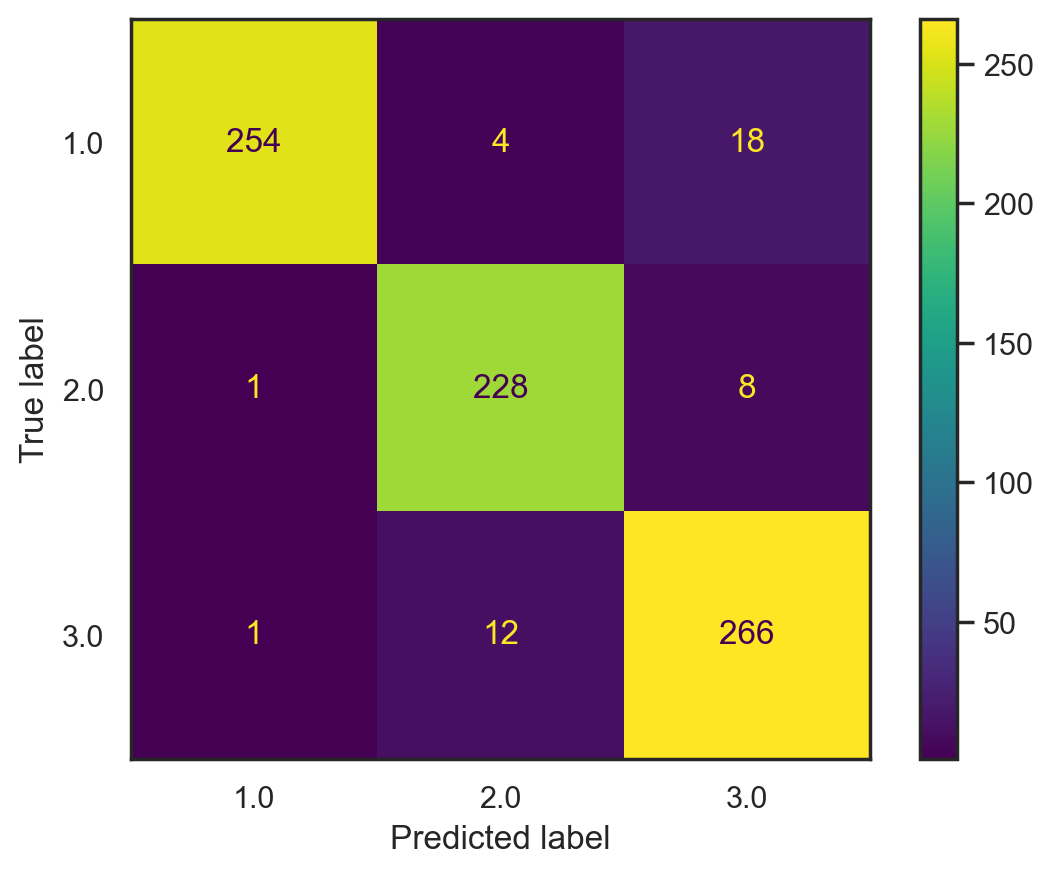

In [55]:
show_Accuracy(clf, X_train, y_train, X_test, y_test)

**Summary:** The current neural network has a test accuracy of 94.4%. 